In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

FEATURE_NAMES = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] #kolom yang diambil

iris = pd.read_csv(r"E:\Kuliah\Bisnis Cerdas\Pertemuan 3\iris.csv") #inisialisasi iris
X = pd.DataFrame(iris, columns = FEATURE_NAMES) #membuat dataframe dengan mengambil nilai sesuai feature kolom
target = preprocessing.LabelEncoder()
target.fit(iris.variety) 
y= target.transform(iris.variety) #representing  class dengan sklearn

In [2]:
X[:150]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split # membagi data menjadi training dan test set dengan random state nim
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35,random_state = 96218058)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (97, 4) (97,)
Test set: (53, 4) (53,)


In [5]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier 
model = DecisionTreeClassifier(criterion="gini", max_depth = 6) #gini
model.fit(X_train,y_train)

model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 6) #entropy
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Visualisasi

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [7]:
!dot -Tpng tree.dot -o tree.png

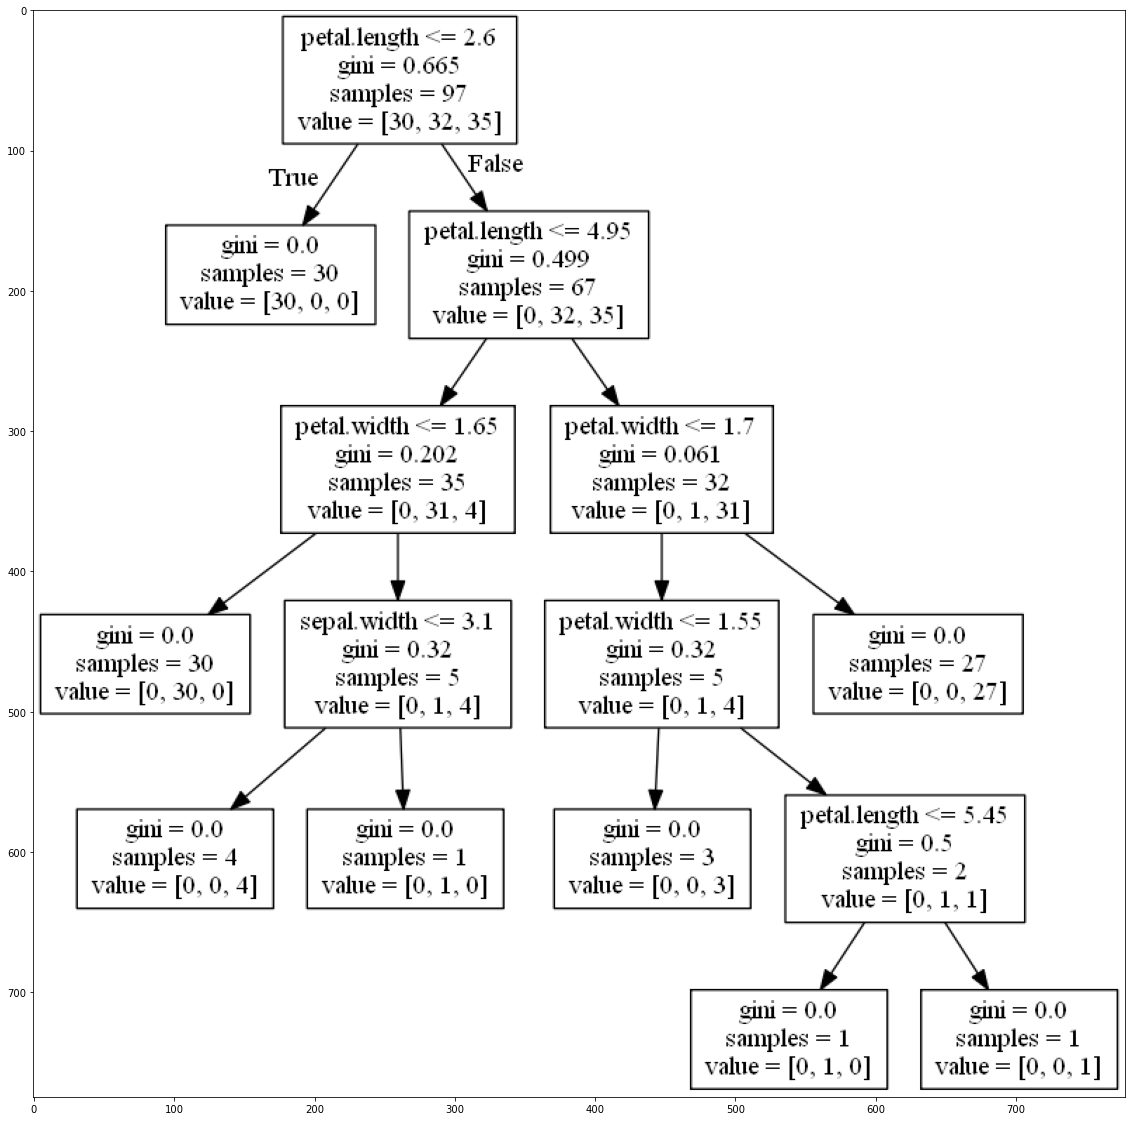

In [8]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [9]:
predictedTree = model.predict(X_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree)

0.9811320754716981

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        15

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



# entropy

In [12]:
export_graphviz(model2, 'tree2.dot', feature_names = FEATURE_NAMES)

In [13]:
!dot -Tpng tree2.dot -o tree2.png

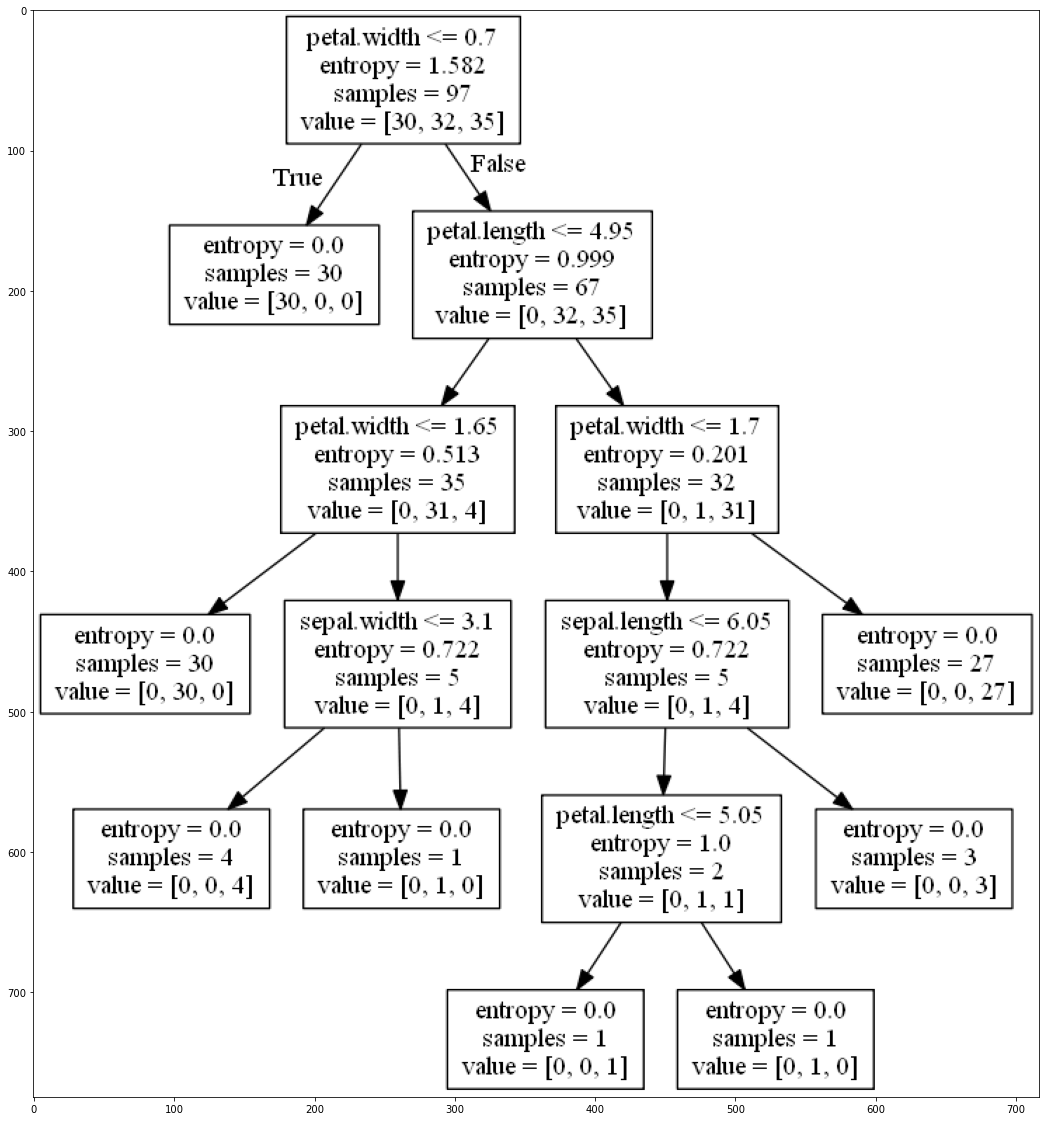

In [14]:
%matplotlib inline
img2 = cv2.imread('tree2.png')
plt.figure(figsize = (20, 20))
plt.imshow(img2)

In [15]:
predictedTree2 = model2.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, predictedTree2)

0.9811320754716981

In [17]:
print(classification_report(y_test, predictedTree2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        15

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

